In [1]:
# TODO:
# (DONE) Clean up datatypes
# (DONE) Rename columns
# (DONE) Fill in missing values

In [2]:
# Imports
import matplotlib
import pandas
import seaborn

In [3]:
# Read in data
properties = pandas.read_csv('data/properties_2016.csv',
                             dtype={'hashottuborspa' : str,
                                    'propertycountylandusecode' : str,
                                    'propertyzoningdesc' : str,
                                    'fireplaceflag' : str,
                                    'taxdelinquencyflag' : str})

### Check feature

In [4]:
feature_name = 'fips'

In [5]:
# Summary statistics
properties[[feature_name]].describe()

,fips
count,2.973780e+06
mean,6.048032e+03
std,2.023278e+01
min,6.037000e+03
25%,6.037000e+03
50%,6.037000e+03
75%,6.059000e+03
max,6.111000e+03


In [6]:
# Number of unique values
properties[feature_name].nunique()

3

In [7]:
# Unique values
sorted(properties[feature_name].unique())

[6037.0, 6059.0, 6111.0, nan]

In [8]:
# Percent null
properties[feature_name].isnull().sum()/properties.shape[0]

0.0038312122703307665

### Investigate potential duplicate features

In [9]:
# finishedfloor1squarefeet: 2,782,500 null
# finishedsquarefeet50: 2,782,500 null
properties[properties['finishedfloor1squarefeet'].isnull()].shape

(2782500, 58)

In [10]:
# 2,782,500 null; 201,836 equal; 881 not equal
a = properties[['finishedfloor1squarefeet', 'finishedsquarefeet50']].copy()
a = a.dropna()
a = a[a['finishedfloor1squarefeet'] != a['finishedsquarefeet50']]
a.head()

,finishedfloor1squarefeet,finishedsquarefeet50
387,920.0,2177.0
552,3135.0,6390.0
1122,4063.0,8210.0
1161,410.0,1299.0
15143,1478.0,3107.0


In [11]:
# Drop? 
# properties = properties.drop('finishedfloor1squarefeet', axis=1)

In [12]:
# censustractandblock has more nulls than rawcensustractandblock.
col_1 = 'rawcensustractandblock'
col_2 = 'censustractandblock'
print([
    properties[properties[col_1].isnull()].shape[0],
    properties[properties[col_2].isnull()].shape[0]
])

[11437, 75126]


In [13]:
a = properties[[col_1, col_2]].copy()
a = a.dropna()
a = a[a[col_1] != a[col_2]]
a.head()

,rawcensustractandblock,censustractandblock
295,6.111001e+07,6.111001e+13
296,6.111001e+07,6.111001e+13
297,6.111001e+07,6.111001e+13
298,6.111001e+07,6.111001e+13
299,6.111001e+07,6.111001e+13


In [14]:
print([a.iloc[0][1], a.iloc[0][0]])

[61110010011023.0, 61110010.011023]


### Set up

In [15]:
properties = properties.rename(columns={
    # Identification-related
    # TODO: some of these may be useful as categorical variables
    'parcelid' : 'parcel_id',                           # 2,985,217 nunique
    'airconditioningtypeid' : 'ac_id',                  # [nan, 1, 3, 5, 9, 11, 12, 13]
    'architecturalstyletypeid' : 'arch_id',             # [nan, 2, 3, 5, 7, 8, 10, 21, 27]
    'buildingclasstypeid' : 'framing_id',               # [nan, 1, 2, 3, 4, 5]
    'buildingqualitytypeid' : 'quality_id',             # 12 nunique
    'heatingorsystemtypeid' : 'heating_id',             # 14 nunique
    'propertycountylandusecode' : 'county_zoning_id',   # 240 nunique
    'propertylandusetypeid' : 'zoning_id',              # 15 nunique
    'regionidcity' : 'city_id',                         # 186 nunique
    'regionidcounty' : 'county_id',                     # [nan, 1286, 2061, 3101]
    'regionidneighborhood' : 'neighborhood_id',         # 528 nunique
    'regionidzip' : 'zipcode_id',                       # 405 nunique
    'typeconstructiontypeid' : 'material_id',           # [nan, 4, 6, 10, 11, 13]
    'fips' : 'fips',                                    # [nan, 6037, 6059, 6111]
    'propertyzoningdesc' : 'zoning_desc_id',            # 5,638 nunique
    'rawcensustractandblock' : 'raw_census_id',         # 99,393 nunique. Might be a duplicate
    'censustractandblock' : 'census_id',                # 96,771 nunique. Might be a duplicate
    
    # Count-related
    'bathroomcnt' : 'num_bath',
    'bedroomcnt' : 'num_bed',
    'calculatedbathnbr': 'num_calc_bath',
    'fireplacecnt' : 'num_fireplace',
    'fullbathcnt' : 'num_full_bath',
    'garagecarcnt' : 'num_garage',
    'poolcnt' : 'num_pool',
    'roomcnt' : 'num_room',
    'threequarterbathnbr': 'num_34_bath',
    'unitcnt' : 'num_unit',
    'numberofstories' : 'num_story',
    
    # Size-related
    'basementsqft' : 'size_basement',
    'calculatedfinishedsquarefeet' : 'size_fin_total',
    'finishedsquarefeet12' : 'size_fin_living',
    'finishedsquarefeet13' : 'size_perim_living',
    'finishedsquarefeet15' : 'size_total',
    'finishedsquarefeet50' : 'size_fin_first_1',       # Might be a duplicate
    'finishedfloor1squarefeet' : 'size_fin_first_2',   # Might be a duplicate
    'finishedsquarefeet6' : 'size_base',
    'garagetotalsqft' : 'size_garage',
    'lotsizesquarefeet' : 'size_lot',
    'yardbuildingsqft17' : 'size_patio',
    'yardbuildingsqft26' : 'size_storage',
    'poolsizesum' : 'size_pool',
    
    # Tax-related
    'taxvaluedollarcnt' : 'tax_value_total',    
    'structuretaxvaluedollarcnt' : 'tax_value_building',
    'landtaxvaluedollarcnt' : 'tax_value_land',    
    'assessmentyear' : 'tax_year',
    'taxamount' : 'tax_amount',
    'taxdelinquencyyear' : 'tax_delinq_year',    
    
    # Categorical
    'fireplaceflag' : 'flag_fireplace',         # [nan, True]
    'taxdelinquencyflag' : 'flag_tax_delinq',   # ['Y', 'nan']
    'hashottuborspa' : 'flag_tub',              # [nan, True]
    'pooltypeid10' : 'flag_pool_1',             # [nan, 1]
    'pooltypeid2' : 'flag_pool_2',              # [nan, 1]
    'pooltypeid7' : 'flag_pool_3',              # [nan, 1]    
    'storytypeid' : 'flag_basement',            # [nan, 7]
    'decktypeid' : 'flag_deck',                 # [nan, 66]
    
    # General / Other
    'latitude' : 'latitude',
    'longitude' : 'longitude',    
    'yearbuilt' : 'year_built',
})

### Fill in missing values

In [16]:
# Fill in categorical features
columns = [
    'flag_fireplace', 'flag_tax_delinq', 'flag_tub',
    'flag_pool_1', 'flag_pool_2', 'flag_pool_3',
    'flag_basement', 'flag_deck']
for column in columns:
    properties[column] = properties[column].apply(lambda x: 0 if pandas.isnull(x) else 1)

In [17]:
# Fill in continuous features
columns = [
    'size_basement', 'size_storage',    
    'size_perim_living', 'size_base',
    'size_pool', 'size_patio',
    'size_fin_first_1', 'size_fin_first_2',
    'num_34_bath', 'num_fireplace',
    'num_pool', 'num_garage',
    'size_garage', 'num_unit',
    'size_lot', 'size_fin_living',
    'num_full_bath', 'num_calc_bath',
    'size_fin_total'
]
for column in columns:
    properties[column] = properties[column].fillna(0)

In [18]:
# TODO: how to fill in tax-related features? Missing tax value != zero tax value.

### Drop columns

In [19]:
# These feature are >90% null, and currently do not seem useful
# TODO: investigate converting these into one-hot categorical?
columns = [
    'arch_id', 'material_id', 'framing_id',
    'ac_id', 'neighborhood_id', 'heating_id',
    'quality_id', 'zoning_desc_id', 'census_id',
    'city_id',
    'tax_delinq_year',
    'size_total',   # 93.6% null; TODO: which size feature is the least null?
    'num_story',    # This columns has strange values (41 stories?); consider making categorical
]
properties = properties.drop(columns, axis=1)

### Plot

In [20]:
missing_percentage = properties.isnull().sum()
missing_percentage = missing_percentage/properties.shape[0]
missing_percentage = missing_percentage[missing_percentage != 0]
missing_percentage = missing_percentage.sort_values()

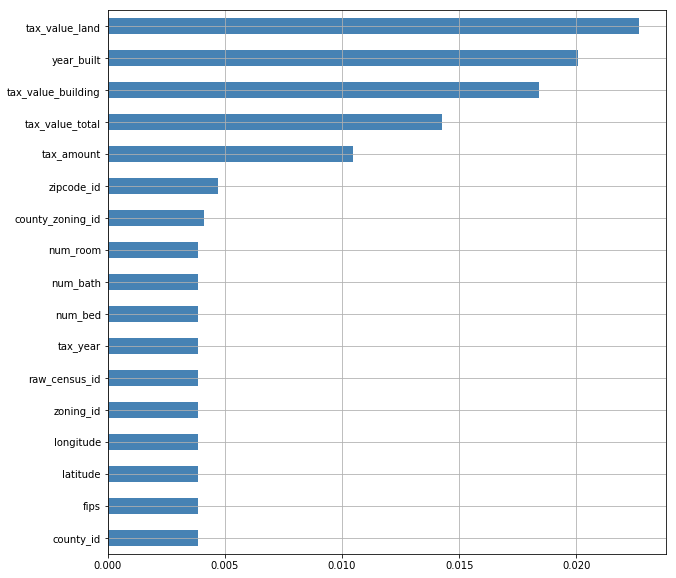

In [21]:
missing_percentage.plot(kind='barh', figsize=(10,10), grid=True, color='steelblue')
matplotlib.pyplot.show()

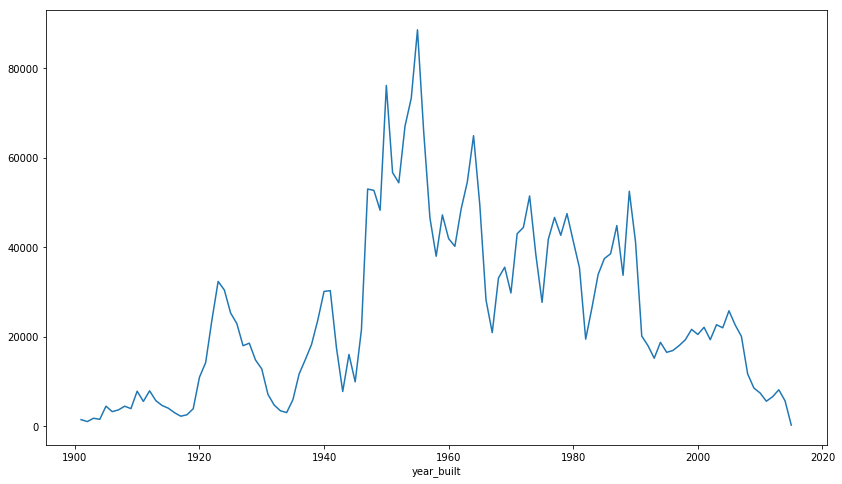

In [22]:
year_built_counts = properties.groupby('year_built').count()['parcel_id']
year_built_counts = year_built_counts.rename('count').sort_index()
year_built_counts = year_built_counts[year_built_counts.index > 1900]   # Very few datapoints before 1900
year_built_counts.plot(figsize=(14,8))
matplotlib.pyplot.show()

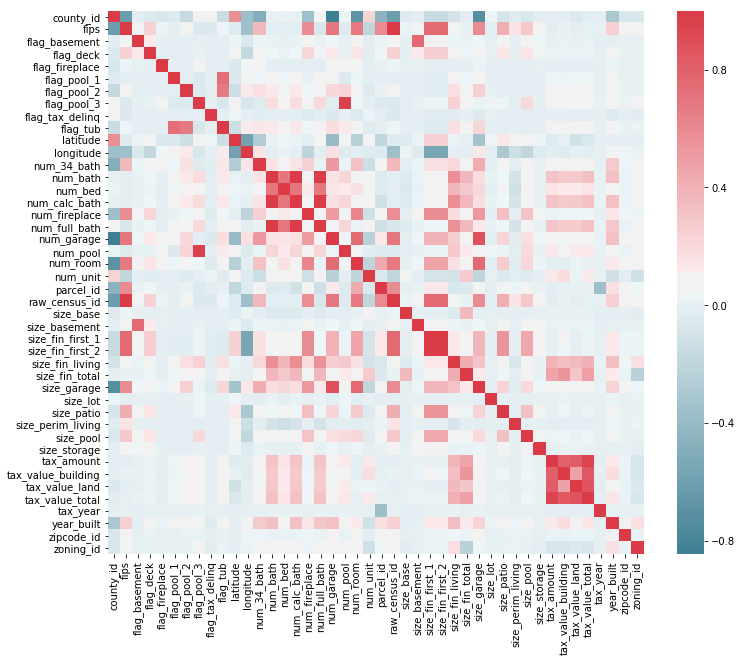

In [23]:
corr = properties.corr()
corr = corr.sort_index()
corr = corr[corr.index]
matplotlib.pyplot.figure(figsize=(12,10))
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
seaborn.heatmap(corr, cmap=cmap)
matplotlib.pyplot.show()

In [24]:
# TODO: anything surprising here?
high_corr = corr.unstack()
high_corr = high_corr[high_corr.abs() > 0.75].reset_index()
high_corr.columns = ['feature_1', 'feature_2', 'corr']
high_corr = high_corr[high_corr['feature_1'] != high_corr['feature_2']]
high_corr = high_corr.reset_index(drop=True)
high_corr.sample(5)

,feature_1,feature_2,corr
28,size_garage,num_garage,0.886692
24,size_fin_first_1,size_fin_first_2,0.995013
9,num_calc_bath,num_full_bath,0.989663
35,tax_value_land,tax_amount,0.821424
20,raw_census_id,size_fin_first_2,0.762378
